<a href="https://colab.research.google.com/github/DrBart20/EksploracjaDanych/blob/main/wstep_do_pandas_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import ticker

plt.rcParams['font.size'] = 12

In [ ]:
import random

# DataFrame

**DataFrame** to jedna z najważniejszych struktur danych w Pandas. Jest to w zasadzie sposób przechowywania danych tabelarycznych, gdzie można etykietować wiersze i kolumny.

* Jednym ze sposobów tworzenia DataFrame jest użycie słownika.

In [ ]:
brics_dict = {
  "country":["Brazil", "Russia", "India", "China", "South Africa"],
  "capital":["Brasilia", "Moscow", "New Delhi", "Beijing", "Pretoria"],
  "area":[8.516, 17.10, 3.286, 9.597, 1.221],
  "population":[200.4, 143.5, 1252, 1357, 52.98]
  }

In [ ]:
brics = pd.DataFrame(brics_dict)
brics

,country,capital,area,population
0,Brazil,Brasilia,8.516,200.40
1,Russia,Moscow,17.100,143.50
2,India,New Delhi,3.286,1252.00
3,China,Beijing,9.597,1357.00
4,South Africa,Pretoria,1.221,52.98


In [ ]:
brics.index = ["BR", "RU", "IN", "CH", "SA"]
brics

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [ ]:
continent_list = ['South America', "Euroasia", "Asia", "Asia", "Africa"]
brics['continent'] = continent_list
brics

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.40,South America
RU,Russia,Moscow,17.100,143.50,Euroasia
IN,India,New Delhi,3.286,1252.00,Asia
CH,China,Beijing,9.597,1357.00,Asia
SA,South Africa,Pretoria,1.221,52.98,Africa


In [ ]:
brics.keys()

Index(['country', 'capital', 'area', 'population', 'continent'], dtype='object')

In [ ]:
for val in brics :
  print(val)

country
capital
area
population
continent


In [ ]:
for lab, row in brics.iterrows():
  print(lab)
  print(row)

BR
country              Brazil
capital            Brasilia
area                  8.516
population            200.4
continent     South America
Name: BR, dtype: object
RU
country         Russia
capital         Moscow
area              17.1
population       143.5
continent     Euroasia
Name: RU, dtype: object
IN
country           India
capital       New Delhi
area              3.286
population       1252.0
continent          Asia
Name: IN, dtype: object
CH
country         China
capital       Beijing
area            9.597
population     1357.0
continent        Asia
Name: CH, dtype: object
SA
country       South Africa
capital           Pretoria
area                 1.221
population           52.98
continent           Africa
Name: SA, dtype: object


In [ ]:
for lab, row in brics.iterrows():
  print(lab + ": " + row["capital"])

BR: Brasilia
RU: Moscow
IN: New Delhi
CH: Beijing
SA: Pretoria


In [ ]:
for lab, row in brics.iterrows() :
  brics.loc[lab, "name_length"] = len(row["country"])

print(brics)

         country    capital    area  population      continent  name_length
BR        Brazil   Brasilia   8.516      200.40  South America          6.0
RU        Russia     Moscow  17.100      143.50       Euroasia          6.0
IN         India  New Delhi   3.286     1252.00           Asia          5.0
CH         China    Beijing   9.597     1357.00           Asia          5.0
SA  South Africa   Pretoria   1.221       52.98         Africa         12.0


In [ ]:
type(brics["country"])

pandas.core.series.Series

In [ ]:
brics [["country","capital"]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


In [ ]:
brics[1:3]

,country,capital,area,population,continent,name_length
RU,Russia,Moscow,17.100,143.5,Euroasia,6.0
IN,India,New Delhi,3.286,1252.0,Asia,5.0


In [ ]:
print(brics[["RU","CH"]])

KeyError: "None of [Index(['RU', 'CH'], dtype='object')] are in the [columns]"

In [ ]:
brics['area']>5

In [ ]:
! pwd

In [ ]:
!ls sample_data/

# Czytanie plików csv za pomoca pandas

In [ ]:
brics = pd.read_csv("brics.csv")
brics

In [ ]:
brics = pd.read_csv("brics.csv", index_col = 0)
brics

In [ ]:
brics["country"]

In [ ]:
brics["country"]

In [ ]:
type(brics["country"])

In [ ]:
brics[["country"]]

In [ ]:
type(brics[["country"]])

In [ ]:
brics[["country", "capital"]]

In [ ]:
brics[["capital", "country"]]

In [ ]:
brics[1:4]

In [ ]:
brics.loc["RU"]

In [ ]:
brics.iloc[0]

In [ ]:
brics['area'] > 5

In [ ]:
brics[brics['area'] > 5]

In [ ]:
brics[brics['population'] > 100]

In [ ]:
brics[(brics['area'] > 5) & (brics['population'] > 100)]

In [ ]:
conditions = (brics['area'] > 5) & (brics['population'] > 100)
brics[conditions]

In [ ]:
plt.plot(brics['country'], brics['area'])

In [ ]:
plt.bar(brics['country'], brics['area'])

In [ ]:
brics.plot(kind='bar', x='country', y="area")

In [ ]:
fig, ax = plt.subplots()

brics.plot(kind='bar', x='country', y="area", ax=ax)
ax.set_xlabel("Kraje")
ax.set_ylabel("Obszar [mln km$^2$]")

In [ ]:
brics.plot(kind='line', x='country', y="area")

# Zadanie 1:

Masz dane o pojazdach z różnych krajów. Każda obserwacja odpowiada jednemu krajowi, a kolumny zawierają informacje o liczbie pojazdów na mieszkańca, o tym, czy ludzie jeżdżą po lewej czy prawej stronie

Zdefiniowane są trzy listy:

- **names**, zawierająca nazwy krajów, dla których dostępne są dane.
- **drivers_right**, lista z wartościami logicznymi, które informują, czy w danym kraju  jeździ się po lewej czy prawej stronie. True znaczy, że jeździ się po prawej stronie
- **cars_per_cap**, liczba pojazdów mechanicznych na 1000 osób w danym kraju.

Każdy klucz w słowniku jest etykietą kolumny, a każda wartość to lista zawierająca elementy kolumny.

Wykorzytując te listy stwórz dataFrame o nazwie df_cars

In [6]:
# Pre-defined lists
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
drivers_right =  [True, False, False, False, True, True, True]
cars_per_cap = [809, 731, 588, 18, 200, 70, 45]


In [7]:
cars_dict = {
    'name':names,
    'drive':drivers_right,
    'cpc':cars_per_cap,
}

df_cars = pd.DataFrame(cars_dict)
df_cars

,name,drive,cpc
0,United States,True,809
1,Australia,False,731
2,Japan,False,588
3,India,False,18
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


### a) Wyświetl wiersze z krajami w których jeździ się po prawej stronie

In [8]:
df_cars[df_cars["drive"]]

,name,drive,cpc
0,United States,True,809
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


b) Wyświetl wiersze z krajami gdzie **cars_per_cap** jest ponad 200

In [9]:
df_cars[df_cars['cpc']>200]

,name,drive,cpc
0,United States,True,809
1,Australia,False,731
2,Japan,False,588


c) Wyświetl wiersze z krajami gdzie jeździ się po prawej stronie i **cars_per_cap** jest ponad 200

In [10]:
conditions = (df_cars["cpc"]>200) & (df_cars["drive"])
df_cars[conditions]

,name,drive,cpc
0,United States,True,809


d) Zrób wykres typu bar pokazujący ile jest samochodów per capital. Podpisz osie wykresu.

Text(0, 0.5, 'Cars per capital')

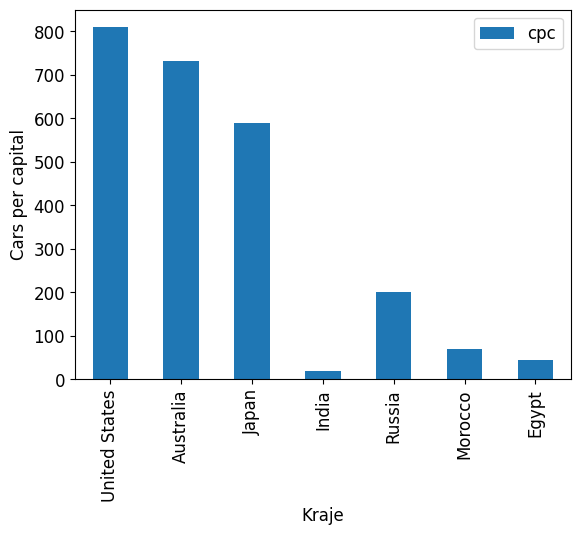

In [11]:
fig, ax = plt.subplots()
df_cars.plot(kind='bar', x='name', y="cpc", ax=ax)
ax.set_xlabel("Kraje")
ax.set_ylabel("Cars per capital")

# Zadanie 2

Praca z plikiem cars.csv

Wczytaj plik cars.csv jako **DataFrame** o nazwie **cars**. Określ argument **index_col** wewnątrz **pd.read_csv()**: ustaw go na 0, aby pierwsza kolumna była używana jako etykiety wierszy.


In [12]:
cars = pd.read_csv("cars.csv", index_col = 0)


FileNotFoundError: [Errno 2] No such file or directory: 'cars.csv'


a) Użyj podwójnych nawiasów kwadratowych, aby wydrukować kolumnę **country** z **cars** jako DataFrame Pandas.



In [ ]:
cars[["country"]]

b) Użyj podwójnych nawiasów kwadratowych, aby wydrukować DataFrame z kolumnami **drives_right** i **country**  z **cars**, w tej kolejności

In [ ]:
cars[["drives_right", "country"]]

c) Użyj **loc** lub **iloc**, aby wybrać obserwację odpowiadającą Japonii jako Serię. Etykieta tego wiersza to JAP, a indeks to 2.

In [ ]:
cars.loc["JAP"]

d) Użyj loc lub iloc, aby wybrać obserwacje dla Australii i Egiptu jako DataFrame.

In [ ]:
cars.loc[["AUS", "EG"]]
cars.iloc[[1,6]]

e) Wydrukuj wartość drives_right wiersza odpowiadającego Maroku (jego etykieta wiersza to MOR).

f) Wydrukuj sub-DataFrame, zawierający obserwacje dla Rosji i Maroka oraz kolumny **country** i **drives_right**.

In [ ]:
cars.iloc["RU","MOR"]["drivers_right"]


g) Wydrukuj kolumnę **drives_right** (dla wszystkich krajów) jako Serię używając loc lub iloc.

In [ ]:
cars.iloc[0:6]["drives_right"]

h) Wydrukuj kolumnę drives_right jako DataFrame używając loc lub iloc.

In [ ]:
cars.loc[[]][["drives_right"]]

# Wykres z dataFrame odczytanym z pliku

In [ ]:
df_bt = pd.read_csv("BTC-USD.csv")

In [ ]:
df_bt.keys()

In [ ]:
df_bt

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_bt['Date'],
         df_bt['Close'], 'b-')
plt.ylabel("Cena [USD]")
plt.xlabel("Czas")
plt.xticks(rotation=90)
plt.title("Bitcoin")
plt.ylabel("Cena [USD]")
plt.xlabel("Czas")
plt.xticks(rotation=90)
plt.title("Bitcoin")


In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_bt['Date'],
         df_bt['Close'], 'b-')
plt.ylabel("Cena [USD]")
plt.xlabel("Czas")
plt.xticks(rotation=90)
plt.title("Bitcoin")
plt.ylabel("Cena [USD]")
plt.xlabel("Czas")
plt.xticks(rotation=45)
plt.title("Bitcoin")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

# Zadnie 3  

Masz dane o kursie bitcoin ethereum ETH-USD.csv (ściągnięte z finance.yahoo.com). Wczytaj za pomocą pandas i zrób wykres kursu ETH

In [5]:
df_eth = pd.read_csv("ETH-USD.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'ETH-USD.csv'

In [ ]:
df_eth.keys()

In [ ]:
df_eth

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_eth['Date'],
         df_eth['Close'], 'b-')
plt.ylabel("Cena [USD]")
plt.xlabel("Czas")
plt.xticks(rotation=90)
plt.title("Ethernum")
plt.ylabel("Cena [USD]")
plt.xlabel("Czas")
plt.xticks(rotation=90)
plt.title("Ethernum")

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(df_eth['Date'],
         df_eth['Close'], 'b-')
plt.ylabel("Cena [USD]")
plt.xlabel("Czas")
plt.xticks(rotation=90)
plt.title("Ethernum")
plt.ylabel("Cena [USD]")
plt.xlabel("Czas")
plt.xticks(rotation=45)
plt.title("Ethernum")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

NameError: name 'df_eth' is not defined

<Figure size 1200x500 with 0 Axes>